 # Chronic Kidney Disease

🏆 Problem Statement: Using the data which has 25 features to predict patient with chronic kidney disease

### Libraries

In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from sklearn.impute import SimpleImputer
import pandas as pd
from numpy import isnan
from sklearn.preprocessing import LabelEncoder
from numpy import nan
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# For Model Evaluation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc 
from matplotlib import pyplot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Load data

In [72]:
df_data=pd.read_csv("kidney_disease.csv")


# Data analysis

In [73]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [74]:
df_data.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


📉 Observation
      <li><b>Observation One:</b>All Column Names</b> are not user-friendly.</li>
      <li><b>Observation Two:</b>Following columns values in numeric but reflect as text column
        <ul>
          <li>pcv (packed_cell_volume)</li>
          <li>wc (white_blood_cell_count)</li>
          <li>rc (red_blood_cell_count)</li>
        </ul>
      </li>


In [75]:
missing = df_data.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(20)

rbc     152
rc      130
wc      105
pot      88
sod      87
pcv      70
pc       65
hemo     52
su       49
sg       47
al       46
bgr      44
bu       19
sc       17
bp       12
age       9
ba        4
pcc       4
htn       2
dm        2
dtype: int64

In [76]:
# dropping 'id' column
df_data.drop('id', axis = 1, inplace = True)

<b>📉 Observation :</b>
    <li><b>Observation Three:</b> Certain columns contain <b>missing data</B> that necessitates our attention and management.</li>


In [77]:
print(f"dm :- {df_data['dm'].unique()}")
print(f"cad :- {df_data['cad'].unique()}")
print(f"classification :- {df_data['classification'].unique()}")

dm :- ['yes' 'no' ' yes' '\tno' '\tyes' nan]
cad :- ['no' 'yes' '\tno' nan]
classification :- ['ckd' 'ckd\t' 'notckd']


Observation :
    <li><b>Observation Four:</b> There are typo errors in dm (diabetes_mellitus), cad (coronary_artery_disease), and classification (class) columns</li>
    <li><b>Observation Five:</b> Need to change all column with Text value to Numeric</li>


# Preprocessing 

<li><b>Resolving Observation One:</b> Allocate more user-friendly names to the columns</li>

In [78]:
# Notice the unfriendly column names
df_data.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [79]:
df_data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'class']

In [80]:
# Friendly column names allocated
df_data.head(3)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


 🚩 Column Names renamed successfully

<li><b>Resolving Observation Two:</b> Converting text columns (packed_cell_volume, white_blood_cell_count and red_blood_cell_count) to numeric format</li>

In [81]:
# Notice these columns are of datatype Object
text_columns = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

for column in text_columns:
    print(f"{column} -: {df_data[column].dtype}")

packed_cell_volume -: object
white_blood_cell_count -: object
red_blood_cell_count -: object


In [82]:
# Convert text column to numeric column
def convert_text_to_numeric_col (dataframe, feature):
    dataframe[feature] = pd.to_numeric(df_data[feature], errors='coerce')

for column in text_columns:
    convert_text_to_numeric_col(df_data, column)
    print(f"text_columns: {df_data[column].dtype}")

text_columns: float64
text_columns: float64
text_columns: float64


In [83]:
df_data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

In [84]:
df_data['coronary_artery_disease'].value_counts()

no      362
yes      34
\tno      2
Name: coronary_artery_disease, dtype: int64

 🚩 Column Names (packed_cell_volume, white_blood_cell_count and red_blood_cell_count) converted to numeric successfully


<li><b>Resolving Observation Three:</b> Resolving missing data</li>

In [85]:
# Replacing missing values in all numeric columns with mean
def mean_value_imputation(dataframe, feature):
    mean_value=dataframe[feature].mean()
    dataframe[feature].fillna(value=mean_value, inplace=True)

# Replacing missing values in all categorical columns with highest frequency data
def impute_mode(dataframe, feature):
    mode = dataframe[feature].mode()[0]
    dataframe[feature] = dataframe[feature].fillna(mode)  

In [86]:
# Obtaining columns names of all numerical features
num_columns = [col for col in df_data.columns if df_data[col].dtype != 'object']

# Assigning random number to all missing data in numeric columns
for column_name in num_columns:
    mean_value_imputation(df_data,column_name)

In [87]:
# Obtaining columns names of all categorized features
cat_columns = [col for col in df_data.columns if df_data[col].dtype == 'object']
impute_mode(df_data,"blood_pressure")

# Assigning highest frequency to all missing data in categorical columns
for column_name in cat_columns:
    impute_mode(df_data,column_name)

In [88]:
missing = df_data.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(20)

Series([], dtype: int64)

 🚩 All missing values have been filled up</b>


<li><b>Resolving Observation Four:</b> Typo Errors in dm (diabetes_mellitus), cad (coronary_artery_disease), and classification (class) columns</li>

In [89]:
print(f"diabetes_mellitus :- {df_data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease :- {df_data['coronary_artery_disease'].unique()}")
print(f"class :- {df_data['class'].unique()}")

diabetes_mellitus :- ['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease :- ['no' 'yes' '\tno']
class :- ['ckd' 'ckd\t' 'notckd']


In [90]:
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].replace(to_replace = {' yes':'yes', '\tno':'no', '\tyes':'yes'})
df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df_data['class'] = df_data['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [91]:
print(f"diabetes_mellitus'] :- {df_data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease :- {df_data['coronary_artery_disease'].unique()}")
print(f"class :- {df_data['class'].unique()}")

diabetes_mellitus'] :- ['yes' 'no']
coronary_artery_disease :- ['no' 'yes']
class :- ['ckd' 'not ckd']


<li><b>Resolving Observation Five:</b> Feature Encoding - Need to change all column with Text value to Numeric</li>

In [92]:
df_data['class'] = df_data['class'].map({'ckd': 1, 'not ckd': 0})
df_data['red_blood_cells'] = df_data['red_blood_cells'].map({'normal': 1, 'abnormal': 0})
df_data['pus_cell'] = df_data['pus_cell'].map({'normal': 1, 'abnormal': 0})
df_data['pus_cell_clumps'] = df_data['pus_cell_clumps'].map({'present': 1, 'notpresent': 0})
df_data['bacteria'] = df_data['bacteria'].map({'present': 1, 'notpresent': 0})
df_data['hypertension'] = df_data['hypertension'].map({'yes': 1, 'no': 0})
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].map({'yes': 1, 'no': 0})
df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].map({'yes': 1, 'no': 0}) 
df_data['appetite'] = df_data['appetite'].map({'good': 1, 'poor': 0})
df_data['peda_edema'] = df_data['peda_edema'].map({'yes': 1, 'no': 0})
df_data['anemia'] = df_data['anemia'].map({'yes': 1, 'no': 0})

In [93]:
for column in text_columns:
    convert_text_to_numeric_col(df_data, column)

In [94]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [95]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

# Modeling

## Splitting Dataset

In [96]:
# Define Class as Target Variable, and the rest as feature variable
X = df_data.drop("class", axis=1)     # everything except 'class' column
y = df_data['class']

# Define the train dataset as 70% and test dataset as 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

# Confirm that the records returned for Train is about 70% and Test is about 30%
print(f"'X' shape: {X_train.shape}")
print(f"'y' shape: {X_test.shape}")

'X' shape: (280, 24)
'y' shape: (120, 24)


## Training Models

In [97]:
# Random Forest
clf_rand_forest = RandomForestClassifier()
clf_rand_forest.fit(X_train, Y_train)

# SVM
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train, Y_train)

# KNN
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, Y_train)

# Decision Tree
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train, Y_train)


DecisionTreeClassifier()

## Model evaluation

In [98]:
# Printing of Model Evaluation Report
def print_std_model_evaulation_rpt(Y_test, Y_pred):
    print(classification_report(Y_test, Y_pred))
    print(f"mean_absolute_error :- {mean_absolute_error(Y_test,Y_pred)}")
    print(f"mean_absolute_error :- {mean_squared_error(Y_test,Y_pred, squared=False)}")
    cm1 = confusion_matrix(Y_test, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_rand_forest.classes_)
    disp.plot()
    plt.show()
    


### Random Forest

#### Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        70

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

mean_absolute_error :- 0.0
mean_absolute_error :- 0.0


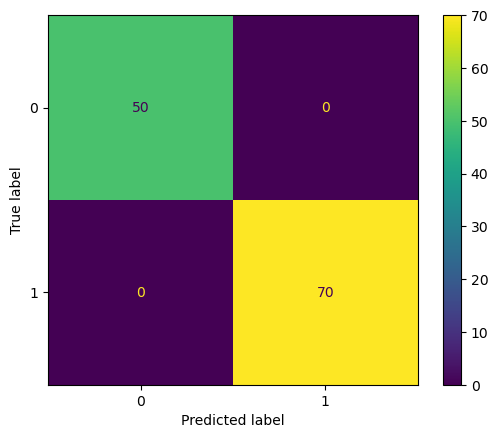

In [99]:
# Random Forest
Y_pred = clf_rand_forest.predict(X_test)
rand_forest_acc = accuracy_score(Y_test, Y_pred)
print_std_model_evaulation_rpt(Y_test, Y_pred)

### SVM

#### Classification Report

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.96      0.98        47

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

mean_absolute_error :- 0.025
mean_absolute_error :- 0.15811388300841897


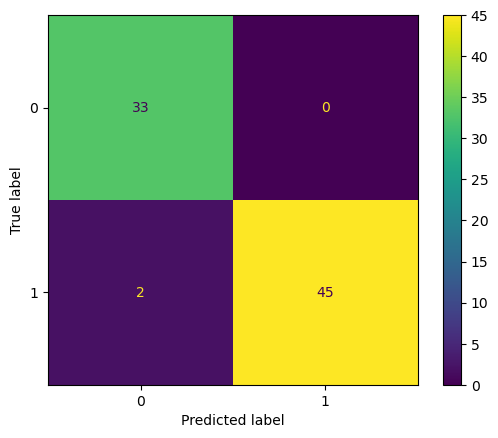

In [100]:
from sklearn.svm import SVC
X = df_data.drop("class", axis=1)     # everything except 'class' column
y = df_data['class']
# Define the train dataset as 70% and test dataset as 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

clf_svm = svm.SVC(kernel='linear') #0.97
# clf_svm = SVC(gamma='auto') # 0.59
# clf_svm = SVC(kernel='poly') # 0.59
# clf_svm = SVC(kernel='rbf',gamma=0.01) # 0.59
# clf_svm.fit(X_test,Y_test)
clf_svm.fit(X_train, Y_train)

Y_pred = clf_svm.predict(X_test)
svm_acc = accuracy_score(Y_test, Y_pred)
print_std_model_evaulation_rpt(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.62      0.79      0.69        33
           1       0.82      0.66      0.73        47

    accuracy                           0.71        80
   macro avg       0.72      0.72      0.71        80
weighted avg       0.73      0.71      0.71        80

mean_absolute_error :- 0.2875
mean_absolute_error :- 0.5361902647381804


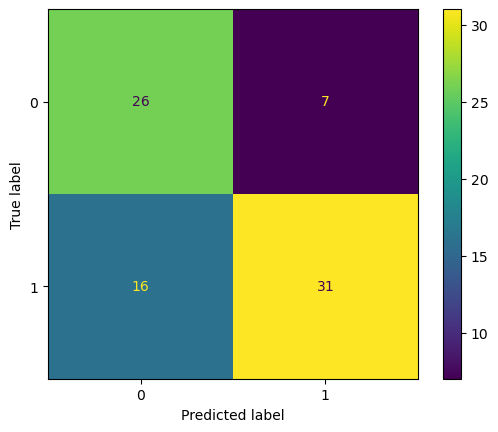

In [101]:
### KNN
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, Y_train)
Y_pred = clf_knn.predict(X_test)
knn_acc2 = accuracy_score(Y_test, Y_pred)
print_std_model_evaulation_rpt(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.96      0.96      0.96        47

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

mean_absolute_error :- 0.05
mean_absolute_error :- 0.22360679774997896


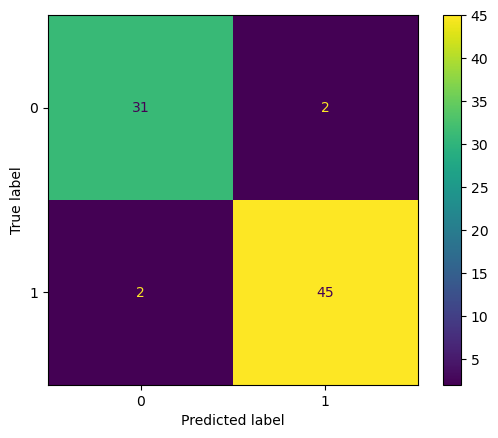

In [102]:
### Decision Tree
Y_pred = clf_dtc.predict(X_test)
dtc_acc = accuracy_score(Y_test, Y_pred)
print_std_model_evaulation_rpt(Y_test, Y_pred)

In [103]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'SVM Classifier', 'KNN Classifier', 'Decision Tree Classifier'],
    'Score' : [rand_forest_acc, svm_acc,knn_acc, dtc_acc]
})


sorted_models = models.sort_values(by = 'Score', ascending = True)

fig = px.bar(data_frame = sorted_models, x = 'Score', y = 'Model',
       title = 'Models Comparison')

fig.show()

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define a range of hyperparameters to search through
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  # Adjust the range of k as needed
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'p': [1, 2],  # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best KNN model with tuned hyperparameters
best_knn = grid_search.best_estimator_

# Fit the best model on the training data
best_knn.fit(X_train, Y_train)

# Predict on the test data
Y_pred = best_knn.predict(X_test)

# Calculate accuracy
knn_acc1 = accuracy_score(Y_test, Y_pred)

# Print the classification report
classification_rep = classification_report(Y_test, Y_pred)

# Print the best hyperparameters and their corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", knn_acc1)
print("Classification Report:\n", classification_rep)


Best Hyperparameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.825
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81        33
           1       0.92      0.77      0.84        47

    accuracy                           0.82        80
   macro avg       0.83      0.84      0.82        80
weighted avg       0.84      0.82      0.83        80



In [105]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'SVM Classifier', 'KNN Classifier', 'Decision Tree Classifier','KNN-hyperParamter'],
    'Score' : [rand_forest_acc, svm_acc,knn_acc2, dtc_acc,knn_acc1]
})


sorted_models = models.sort_values(by = 'Score', ascending = True)

fig = px.bar(data_frame = sorted_models, x = 'Score', y = 'Model',
       title = 'Models Comparison')

fig.show()

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Create a Random Forest classifier for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RF model on your entire dataset (X_train and Y_train)
rf.fit(X_train, Y_train)

# Use feature importance scores to select the most important features
feature_selector = SelectFromModel(rf, threshold='median')
feature_selector.fit(X_train, Y_train)

# Transform your datasets to include only the selected features
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)


In [107]:
print("Shapes of X_train_selected, Y_train:", X_train_selected.shape, Y_train.shape)
print("Shapes of X_test_selected, Y_test:", X_test_selected.shape, Y_test.shape)


Shapes of X_train_selected, Y_train: (320, 12) (320,)
Shapes of X_test_selected, Y_test: (80, 12) (80,)


In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the selected feature set
knn.fit(X_train_selected, Y_train)

# Make predictions on the test set with the selected features
Y_pred = knn.predict(X_test_selected)

# Calculate accuracy
knn_acc3= accuracy_score(Y_test, Y_pred)

# Print the classification report to evaluate the KNN model
classification_rep = classification_report(Y_test, Y_pred)

# Print the accuracy and classification report
print("Accuracy:", knn_acc)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7125
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.76      0.68        33
           1       0.80      0.68      0.74        47

    accuracy                           0.71        80
   macro avg       0.71      0.72      0.71        80
weighted avg       0.73      0.71      0.71        80



In [109]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'SVM Classifier', 'KNN Classifier', 'Decision Tree Classifier','KNN-hyperParamter','KNN_RF'],
    'Score' : [rand_forest_acc, svm_acc,knn_acc2, dtc_acc,knn_acc1,knn_acc3]
})


sorted_models = models.sort_values(by = 'Score', ascending = True)

fig = px.bar(data_frame = sorted_models, x = 'Score', y = 'Model',
       title = 'Models Comparison')

fig.show()

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen classifier

# Create an instance of your classifier (e.g., RandomForestClassifier)
clf = RandomForestClassifier(random_state=1)

# Perform k-fold cross-validation (e.g., 5-fold cross-validation)
# This will split the training data into 5 subsets (folds) and train/validate the model 5 times
# You can adjust the number of folds using the cv parameter
cv_scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


Cross-Validation Scores: [0.984375 0.953125 1.       1.       0.984375]
Mean Accuracy: 0.984375
Standard Deviation of Accuracy: 0.01711632992203644


- Fold 1: 0.984375 (98.44%)
- Fold 2: 0.953125 (95.31%)
- Fold 3: 1.000000 (100.00%)
- Fold 4: 1.000000 (100.00%)
- Fold 5: 0.984375 (98.44%)
These accuracy scores represent the model's performance on different subsets of the training data when using 5-fold cross-validation. The scores are generally high, with a minimum accuracy of 95.31% and a maximum accuracy of 100.00%, indicating that the model performs well across different subsets of the data.

In [111]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, Y_train)

# Feature selection using Gradient Boosting feature importances
sfm = SelectFromModel(gb_classifier, threshold=0.1)  # Adjust threshold as needed
sfm.fit(X_train, Y_train)

# Transform the data to keep only selected features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a K-Nearest Neighbors (KNN) classifier on the selected features
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_selected, Y_train)

# Make predictions with the KNN model
y_pred = knn_classifier.predict(X_test_selected)

# Evaluate the KNN model's accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy of KNN model with selected features: {accuracy:.2f}')


Accuracy of KNN model with selected features: 0.93


Accuracy: 0.93
Precision: 0.96
Recall: 0.91
F1 Score: 0.93
AUC-ROC: 0.93


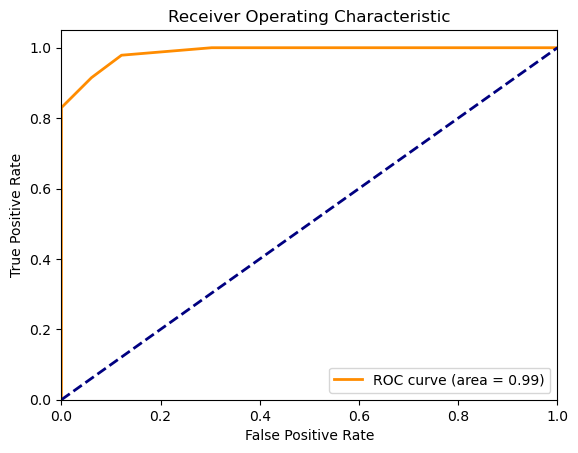

In [112]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, Y_train)

# Feature selection using Gradient Boosting feature importances
sfm = SelectFromModel(gb_classifier, threshold=0.1)  # Adjust threshold as needed
sfm.fit(X_train, Y_train)

# Transform the data to keep only selected features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a K-Nearest Neighbors (KNN) classifier on the selected features
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_selected, Y_train)

# Make predictions with the KNN model
Y_pred = knn_classifier.predict(X_test_selected)

# Calculate and print various evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, knn_classifier.predict_proba(X_test_selected)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'SVM Classifier', 'KNN Classifier', 'Decision Tree Classifier','KNN-hyperParamter','KNN_RF'],
    'Score' : [rand_forest_acc, svm_acc,knn_acc2, dtc_acc,knn_acc1,knn_acc3]
})


sorted_models = models.sort_values(by = 'Score', ascending = True)

fig = px.bar(data_frame = sorted_models, x = 'Score', y = 'Model',
       title = 'Models Comparison')

fig.show()

In [116]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, Y_train)

# Feature selection using Gradient Boosting feature importances
sfm = SelectFromModel(gb_classifier, threshold=0.1)  # Adjust threshold as needed
sfm.fit(X_train, Y_train)

# Transform the data to keep only selected features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a K-Nearest Neighbors (KNN) classifier on the selected features
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_selected, Y_train)

# Make predictions with the KNN model
y_pred = knn_classifier.predict(X_test_selected)

# Calculate additional evaluation metrics
KNN_gb = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {KNN_gb:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


Accuracy: 0.93
Precision: 0.96
Recall: 0.91
F1 Score: 0.93
ROC AUC: 0.93


In [117]:
models = pd.DataFrame({
    'Model' : [ 'Random Forest Classifier', 'SVM Classifier', 'KNN Classifier', 'Decision Tree Classifier','KNN-hyperParamter','KNN_RF','KNN-GB'],
    'Score' : [rand_forest_acc, svm_acc,knn_acc2, dtc_acc,knn_acc1,knn_acc3,KNN_gb]
})


sorted_models = models.sort_values(by = 'Score', ascending = True)

fig = px.bar(data_frame = sorted_models, x = 'Score', y = 'Model',
       title = 'Models Comparison')

fig.show()